In [20]:
import sympy as sym
import numpy as np
sym.init_printing()

import matplotlib
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [93]:
alpha, r, lam, R, v, u, beta, c = sym.symbols('alpha, r, L, R, v, u, beta, c')

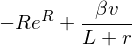

In [94]:
workers =  beta * v / (r + lam) -R* sym.exp(R)
workers

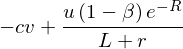

In [95]:
firms = u*sym.exp(-R)*(1-beta)/(r+lam)-v*c
firms

In [96]:
steadystate = u*v*sym.exp(-R)-lam*(1-u)
steadystate

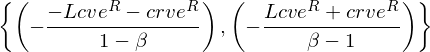

In [97]:
sym.nonlinsolve([workers,firms],[u])

In [98]:
st_frm = sym.nonlinsolve([v/(lam*(1-u))-(1-beta)/(c*(r+lam))],[R])
st_frm

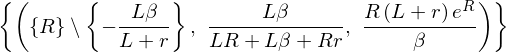

In [99]:
solution = sym.nonlinsolve([firms, workers, steadystate], [R, u, v])

solution

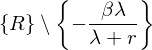

In [100]:
R_sol

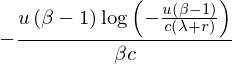

In [101]:
v_sol

In [102]:
welfare = (1-u)*(R_sol+beta)
welfare

TypeError: Input args to Union must be Sets

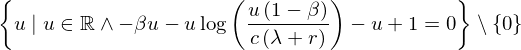

In [103]:
foc_welfare_u = sym.diff(welfare, u)
sym.solveset(foc_welfare_u, u, domain = sym.S.Reals)

In [104]:
foc_welfare_beta = sym.diff(welfare, beta)
sym.solveset(foc_welfare_beta, beta, domain = sym.S.Reals)
#foc_welfare_beta

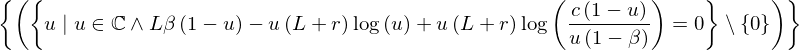

In [105]:
sym.nonlinsolve([beta * lam /(r+lam)*(1-u)/u+sym.log(c*(1-u)/(u*(1-beta)))-sym.log(u)],[u])

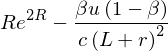

In [106]:
f_w = R*sym.exp(2*R)-u*(1-beta)*beta/(c*(r+lam)**2)
f_w

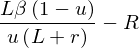

In [107]:
s_w = (1-u)/u*lam*beta/(r+lam)-R
s_w

## try a numerical solution

In [300]:
def ModelSolver(B,L,r_val,c_val,pos):
    return [sym.nsolve(((1-u)/u*lam*beta/(r+lam)-R,R*sym.exp(2*R)-u*(1-beta)*beta/(c*(r+lam)**2),lam-L,r-r_val,c-c_val,beta-i),(u,R,lam,c,beta,r),(.1,1,L,c_val,i,r_val))[pos] for i in B]


ModelSolver([.3, .99], 0.3, 0.95, 0.01,1)


In [301]:
u_vals = [solver(i)[0] for i in np.linspace(.11,1,20,endpoint=False)]
R_vals = [solver(i)[1] for i in np.linspace(.11,1,20,endpoint=False)]
welf = [solver(i)[1]*(1-solver(i)[0]) for i in np.linspace(.11,1,20,endpoint=False)]
welf

In [302]:
plt.plot(u_vals,R_vals,u_vals,welf, 'o')


### find the social optimum

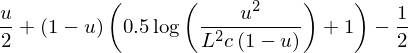

In [191]:
welf_u = (1/2*sym.log(u**2/(lam**2*(1-u)*c))+1)*(1-u)-(1-u)/2
welf_u

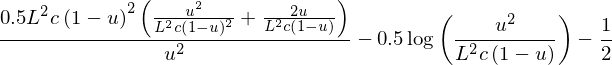

In [192]:
foc_welf_u = sym.diff(welf_u,u)
foc_welf_u

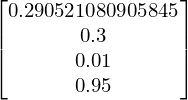

In [197]:
s_opt = sym.nsolve((foc_welf_u,lam-0.3,r-.95,c-.01),(u,lam,c,r),(.1,1,.1, .95))
s_opt

In [205]:
def optRvofU(u,lam,c):
    return [sym.log(u**2/(lam**2*(1-u)*c))/2,lam*(1-u)/u*u**2/(lam**2*(1-u)*c)]

In [212]:
opt_u_pt = [s_opt[0]]
opt_R_pt = [optRvofU(s_opt[0],s_opt[1],s_opt[2])[0]]
opt_welf_pt = [(optRvofU(s_opt[0],s_opt[1],s_opt[2])[0]+1)*(1-s_opt[0])-
               optRvofU(s_opt[0],s_opt[1],s_opt[2])[1]*s_opt[2]]


In [225]:
plt.plot(u_vals,R_vals,u_vals,welf, 'o',opt_u_pt, opt_R_pt,'rx',opt_u_pt,opt_welf_pt,'ro')


In [247]:
def bob(x):
    return [sym.nsolve((u**2-i),(u),(1)) for i in x]
bob([1,2])

<IPython.core.display.Javascript object>


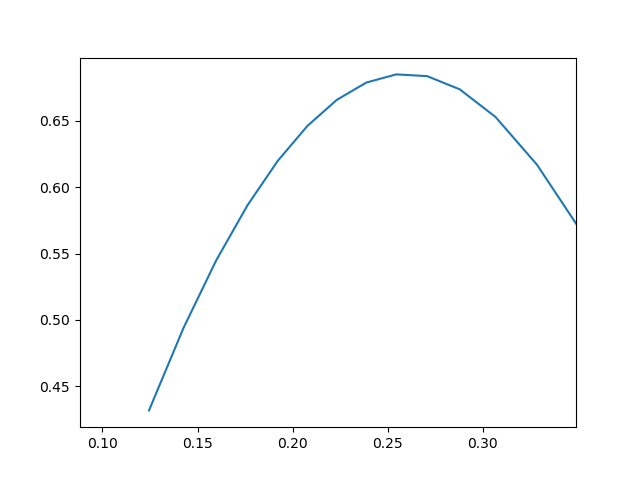

interactive(children=(FloatSlider(value=0.3, description='lam', max=1.0), FloatSlider(value=0.95, description=…

In [306]:
#%xmode Verbose
import ipywidgets as ipw 
x = np.linspace(.2,1,15,endpoint=False)

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
line, = ax.plot(ModelSolver(x, 0.3, 0.95, 0.01,0),ModelSolver(x, 0.3, 0.95, 0.01,1))

def update(lam=0.3, r = .95, c = .01):
    line.set_ydata(ModelSolver(x, lam, r, c,1))
    line.set_xdata(ModelSolver(x, lam, c, c,0))
    fig.canvas.draw()
    
ipw.interact(update, lam=(0.0,1.0), r=(0.9,1.0,.01), c=(0.0,0.1,.01));